In [ ]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# updating matplotlib / should restart runtime before using its features

!pip install matplotlib --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 9.5 MB/s 
     |████████████████████████████████| 957 kB 47.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
# downloading data
!gdown 1mimOTmax-oPDQMXNEeRQxoQH1erpKe74
!gdown 1veF8BcOb8QRIqals6uEPtArim9PD_Xg3
!gdown 1D5EufvBd1B6Q18U31Dp2dMgkvuY2mPmJ

Downloading...
From: https://drive.google.com/uc?id=1mimOTmax-oPDQMXNEeRQxoQH1erpKe74
To: /content/sample_submission.csv
100% 6.28M/6.28M [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1veF8BcOb8QRIqals6uEPtArim9PD_Xg3
To: /content/train.csv
100% 68.8M/68.8M [00:00<00:00, 194MB/s]
Downloading...
From: https://drive.google.com/uc?id=1D5EufvBd1B6Q18U31Dp2dMgkvuY2mPmJ
To: /content/test.csv
100% 60.4M/60.4M [00:00<00:00, 152MB/s]


In [ ]:
Submission = pd.read_csv('sample_submission.csv')
data = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
data.shape

(159571, 8)

Data Visualiziation

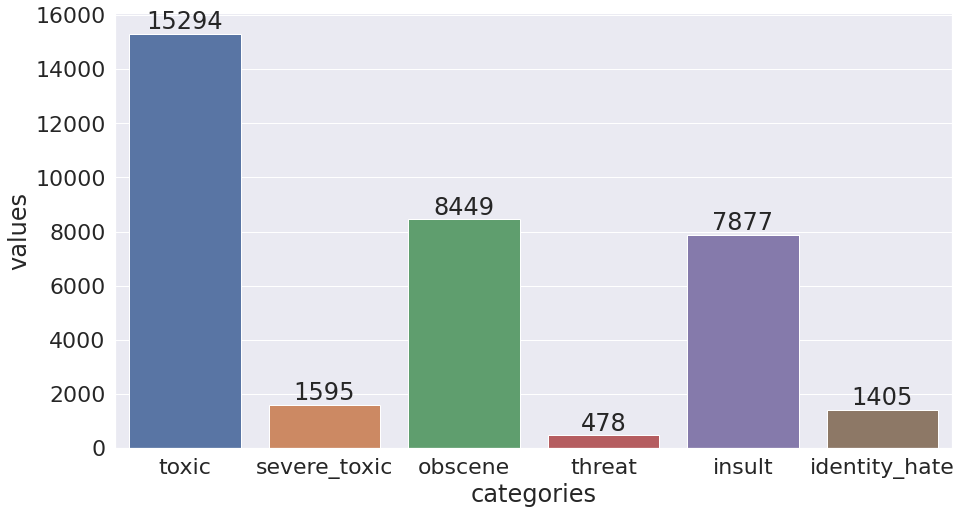

In [ ]:
# first I make a dataset contains number of samples belongs to each label (insult,hate,...)
count = pd.DataFrame(data.iloc[:,2:].sum(axis=0).values , columns=['values'])
# then make a data frame includes the name of each label column in main dataset (insult,hate,...)
categories = pd.DataFrame(data.columns[2:].values , columns=['categories'])
# I merge them together to have a dataset with the names of label columns in row and the number of samples labeled in columns
cat_val = pd.concat([categories,count],axis=1)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='categories',y='values',data=cat_val)
ax.bar_label(ax.containers[0]);

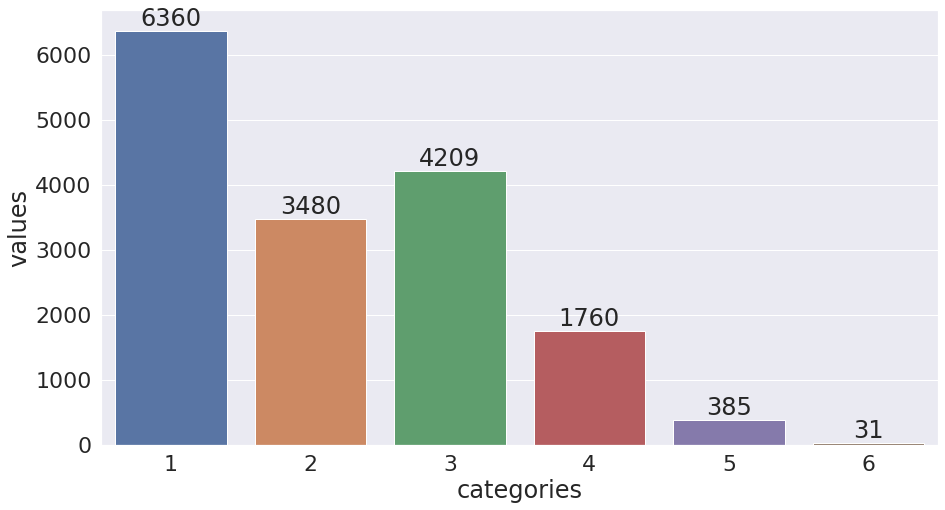

In [ ]:
# in this graph, I want to see how many label belongs to each sample sentences
# for ex. 'I hate you, I will kill you to send you to the hell' may be labeled as toxic, threat, insult and hate
# so we can say this sentences contains 3 labels
# first I make a data frame includes all possible way a sample sentence may have
categories = pd.DataFrame(set(data.iloc[:,2:].sum(axis=1)) , columns=['categories'])
# then I count how many sentences belong to each categories (1,2,...,6)
count = pd.DataFrame(data.iloc[:,2:].sum(axis=1).value_counts() , columns=['values'])
cat_val = pd.concat([categories,count],axis=1)
cat_val = cat_val.drop([0])
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='categories',y='values',data=cat_val)
ax.bar_label(ax.containers[0]);

Preprocessing

In [ ]:
#nlp libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_html(sentence):
  cleanr = re.compile('<.*?>')
  cleant = re.sub(cleanr," " , str(sentence))
  return cleant
def clean_punc(sentence):
  clean = re.sub(r'[?|!|\'|"|#]',r'',sentence)
  clean = re.sub(r'[.|,|)|(|\|/]',r" ",clean)
  clean = clean.strip()
  clean = clean.replace('\n',' ')
  return clean
def keep_alpha(sentence):
  alpha_sent = ""
  for word in sentence.split():
    alpha_word = re.sub('[^a-z A-Z]+', ' ' , word)
    alpha_sent+=alpha_word
    alpha_sent+=' '
  alpha_sent = alpha_sent.strip()
  return alpha_sent

In [ ]:
# using functions to clean train sentences
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(clean_html)
data['comment_text'] = data['comment_text'].apply(clean_punc)
data['comment_text'] = data['comment_text'].apply(keep_alpha)

In [ ]:
# using functions to clean test sentences
test_set['comment_text'] = test_set['comment_text'].str.lower()
test_set['comment_text'] = test_set['comment_text'].apply(clean_html)
test_set['comment_text'] = test_set['comment_text'].apply(clean_punc)
test_set['comment_text'] = test_set['comment_text'].apply(keep_alpha)

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [ ]:
# remove frequnet words in the sentences
data['comment_text'] = data['comment_text'].apply(removeStopWords)
test_set['comment_text'] = test_set['comment_text'].apply(removeStopWords)

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [ ]:
# take root of each words
data['comment_text'] = data['comment_text'].apply(stemming)
test_set['comment_text'] = test_set['comment_text'].apply(stemming)

Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
data_set = data[:30000]
train_set, validation_set = train_test_split(data_set,random_state=42,shuffle=True,test_size=0.2)

In [ ]:
X_train = train_set.iloc[:,1]
X_valid = validation_set.iloc[:,1]
y_train = train_set.drop(['id','comment_text'],axis=1)
y_valid = validation_set.drop(['id','comment_text'],axis=1)

In [ ]:
# vectorize sentences
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tf_idf = TfidfVectorizer(strip_accents='unicode',analyzer='word',ngram_range=(1,3),norm='l2')
X_train = tf_idf.fit_transform(X_train)
X_valid = tf_idf.transform(X_valid)

In [ ]:
# !pip install scikit-multilearn

In [ ]:
# from skmultilearn.problem_transform import LabelPowerset
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# classifier = LabelPowerset(LogisticRegression())
# classifier.fit(X_train, y_train)
# predictions = classifier.predict(X_test)
# print("Accuracy = ",accuracy_score(y_test,predictions))
# print("\n")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1))])
for category in data.columns[2:]:
    LogReg_pipeline.fit(X_train, y_train[category])
    y_pred = LogReg_pipeline.predict(X_valid)
    score = accuracy_score(y_valid[category],y_pred)
    print(f'accuracy on {category} column is {np.round(score,3)}')

In [ ]:
# useing all data to train model and the predicting test_set
data = data
X_train = data.iloc[:,1]
y_train = data.drop(['id','comment_text'],axis=1)
test_set = test_set.iloc[:,1]
X_train = tf_idf.fit_transform(X_train)
test_set = tf_idf.transform(test_set)

In [ ]:
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1))])
Pred = pd.DataFrame()
for category in data.columns[2:]:
    col = [i for i in Submission.columns if i==category]
    LogReg_pipeline.fit(X_train, y_train[category])
    predictions = pd.DataFrame(LogReg_pipeline.predict(test_set),columns= col)
    Pred = pd.concat([Pred,predictions],axis=1)

In [ ]:
Pred.insert(0,'id', Submission.loc[:,'id'])
Pred.to_csv('submission.csv', index=False)